
Modelos Clasificación : Naive Bayes, K-Neighbors, Support Vector Machines.

Autor : Alfredo Voltaire y Pedro Zuñiga

In [0]:
#Importar las librerías necesarias en Python.
import os
import pandas as pd ## Manejo de dataframes
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos.

In [2]:
#os.getcwd()

'/content'

In [0]:
# Leer el dataset en un dataframe usando pandas
datos = pd.read_csv("train.csv") 

In [109]:
# Cabecera
datos.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [110]:
datos.shape

(614, 13)

In [111]:
# Cantidad de nulos en toda la data
datos.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#datos.groupby('Married').size()

Married
No     213
Yes    398
dtype: int64

In [112]:
datos.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001514,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [113]:
# Revisar los valores perdidos
# Creamos una función:
def num_missing(x):
    #suma la cantidad de missing en nuestra data
  return sum(x.isnull())

#Aplicamos nuestra funcion por columna:
print("Valores perdidos por columna")
print(datos.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis = 1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [0]:
# Haciendo unos replace
datos['Dependents'] = datos['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
datos['Gender'] = datos['Gender'].replace({'Female': 1,'Male': 2})
datos['Married'] = datos['Married'].replace({'No': 1,'Yes': 2})
datos['Self_Employed'] = datos['Self_Employed'].replace({'No': 1,'Yes': 2})
datos['Education'] = datos['Education'].replace({'Graduate': 1,'Not Graduate': 2})
datos['Credit_History'] = datos['Credit_History'].replace({0: 1,1: 2})
datos['Property_Area'] = datos['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [115]:
datos.shape

(614, 13)

In [0]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas; para las cualitativas, moda.
# Imputamos por moda todas las variables cualitativas
for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    datos[column] = datos[column].fillna(datos[column].mode()[0])

# Imputamos por mediana todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    datos[column] = datos[column].fillna(datos[column].median())  

In [15]:
# Aplicamos nuestra funcion a la data imputada por columna:
print("Valores perdidos por columna")
print(datos.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [27]:
datos.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,Y
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,N


{'boxes': [<matplotlib.lines.Line2D at 0x7f2299a71860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2299a7c0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2299a7cac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2299a7c780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2299a719b0>,
  <matplotlib.lines.Line2D at 0x7f2299a71d68>]}

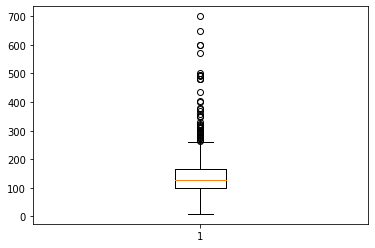

In [134]:
# Análisis de cajas BOX PLOT
import matplotlib.pyplot as plt

plt.boxplot(datos['LoanAmount'])

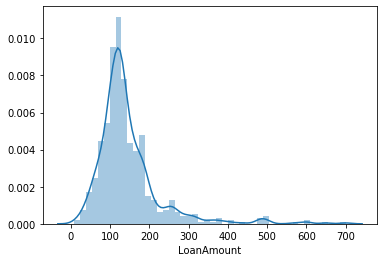

In [0]:
import seaborn as sns
sns.distplot(datos['LoanAmount'])

(array([360.,   0.,   0., 102.,   0.,   0., 101.,   0.,   0.,  51.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

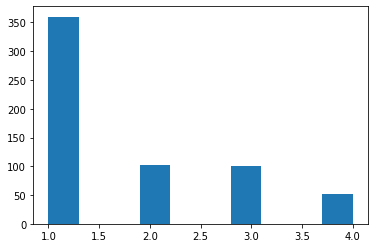

In [133]:
import matplotlib.pyplot as plt
plt.hist(datos['Dependents'])

In [0]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
datos.drop('Loan_ID', axis=1,inplace=True)

In [118]:
datos.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,Y
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,N
2,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,Y
3,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,Y
4,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,Y


In [0]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datos.drop('Loan_Status', axis=1), datos['Loan_Status'], test_size=0.30)

In [0]:
#######################################################################
##### Modelo de Clasificación Bayesiano : de Naive Bayes ##############
#######################################################################

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
NB = GaussianNB()

In [32]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_probas_NB = cross_val_predict(NB, X_train, y_train, cv=3, method="predict_proba")
y_scores_NB = y_probas_NB[:, 1]  # score = probabilidad de clase positiva
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_train, y_scores_NB, pos_label="Y")
roc_auc_NB = auc(fpr_NB, tpr_NB)
roc_auc_score_NB = roc_auc_score(y_train, y_scores_NB)
gini_coef_NB = 2 * roc_auc_score_NB - 1
roc_auc_NB, roc_auc_score_NB, gini_coef_NB

(0.7136278565799842, 0.7136278565799842, 0.42725571315996835)

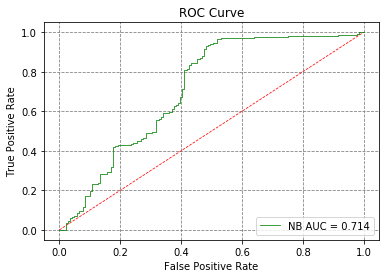

In [35]:
# The ROC Curve Plotting
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rc('grid', linestyle="--", color='grey')
plt.grid()
plt.plot([0, 1], [0, 1],'r--', linewidth=0.75)
plt.plot(fpr_NB, tpr_NB, 'g', linewidth=0.75, label = 'NB AUC = %0.3f' % roc_auc_NB)
plt.legend(loc = 'lower right')
plt.show()

In [36]:
# Training, and prediction on Test dataset. Confusion matrix
NB.fit(X_train, y_train)
pred_NB=NB.predict(X_test)
from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
confusion_matrix(y_test, pred_NB)

Matriz de confusión


array([[ 19,  32],
       [  7, 127]])

In [39]:
# Other additional metrics on Test dataset predictions
from sklearn.metrics import classification_report
print('Indicadores')
print(classification_report(y_test, pred_NB))

Indicadores
              precision    recall  f1-score   support

           N       0.73      0.37      0.49        51
           Y       0.80      0.95      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.66      0.68       185
weighted avg       0.78      0.79      0.76       185



In [0]:
#######################################################################
##### Modelo de Clasificación : K-NN ##################################
#######################################################################

In [0]:
from sklearn.neighbors import KNeighborsClassifier # Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=15)  # KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=1)

In [41]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_probas_KNN = cross_val_predict(neigh, X_train, y_train, cv=3, method="predict_proba")
y_scores_KNN = y_probas_KNN[:, 1]  # score = probabilidad de clase positiva
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_train, y_scores_KNN, pos_label="Y")
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
roc_auc_score_KNN = roc_auc_score(y_train, y_scores_KNN)
gini_coef_KNN = 2 * roc_auc_score_KNN - 1
roc_auc_KNN, roc_auc_score_KNN, gini_coef_KNN

(0.5400413711583925, 0.5400413711583925, 0.08008274231678492)

In [0]:
## Reducción de dimensiones utilizando PCA ##

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_array_pca = pca.fit_transform(X_train)  # reduccion de dimensionalidad
X_train_pca = pd.DataFrame(X_train_array_pca, index=X_train.index)  # reemplazamos dichos datos en X_train

In [136]:
X_train_pca.head(10)

,0,1,2
179,-2911.026926,-528.449628,-94.042722
417,-5209.267231,17892.849205,-31.211689
390,4021.746344,-1395.752627,-26.388755
299,-3353.391660,913.509453,-6.050227
251,-1697.870418,-1881.307846,-25.025373
404,2302.063504,-1541.583963,-40.906578
551,-2830.473718,406.011912,-15.193370
89,209.733257,2462.648466,-23.246462
412,962.124343,-1655.096703,-63.178422
197,-3412.576544,346.537854,-13.015675


In [137]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI. CON REDUCCIÓN DE DIMENSIONES
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_probas_KNN_pca = cross_val_predict(neigh, X_train_pca, y_train, cv=3, method="predict_proba")
y_scores_KNN_pca = y_probas_KNN_pca[:, 1]  # score = probabilidad de clase positiva
fpr_KNN_pca, tpr_KNN_pca, thresholds_KNN_pca = roc_curve(y_train, y_scores_KNN_pca, pos_label="Y")
roc_auc_KNN_pca = auc(fpr_KNN_pca, tpr_KNN_pca)
roc_auc_score_KNN_pca = roc_auc_score(y_train, y_scores_KNN_pca)
gini_coef_KNN_pca = 2 * roc_auc_score_KNN_pca - 1
roc_auc_KNN_pca, roc_auc_score_KNN_pca, gini_coef_KNN_pca

(0.5925848672889399, 0.5925848672889399, 0.18516973457787977)

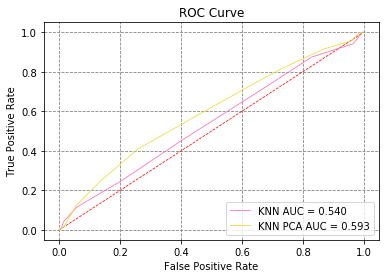

In [138]:
# The ROC Curve Plotting
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rc('grid', linestyle="--", color='grey')
plt.grid()
plt.plot([0, 1], [0, 1],'r--', linewidth=0.75)
plt.plot(fpr_KNN, tpr_KNN, color='#FF69B4', linewidth=0.75, label = 'KNN AUC = %0.3f' % roc_auc_KNN)
plt.plot(fpr_KNN_pca, tpr_KNN_pca, color='#E6DC32', linewidth=0.75, label = 'KNN PCA AUC = %0.3f' % roc_auc_KNN_pca)
plt.legend(loc = 'lower right')
plt.show()

In [43]:
# Training, and prediction on Test dataset. Confusion matrix
neigh.fit(X_train, y_train) 
pred_KNN=neigh.predict(X_test)
from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
confusion_matrix(y_test, pred_KNN)

Matriz de confusión


array([[  9,  42],
       [ 13, 121]])

In [44]:
# Other additional metrics on Test dataset predictions
from sklearn.metrics import classification_report
print('Indicadores')
print(classification_report(y_test, pred_KNN))

Indicadores 
              precision    recall  f1-score   support

           N       0.41      0.18      0.25        51
           Y       0.74      0.90      0.81       134

    accuracy                           0.70       185
   macro avg       0.58      0.54      0.53       185
weighted avg       0.65      0.70      0.66       185



In [0]:
#######################################################################
##### Modelo de Clasificación : SVM ##################################
#######################################################################

In [0]:
# SVMs are sensitive to the features scales
# Vamos a estandarizar nuestras variables predictoras tanto para train y test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # creamos el objeto para estandarizar nuestros datos
X_train_array = sc.fit_transform(X_train.values)  # estandarizando nuestros datos TRAIN
X_train_sc = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)  # reemplazamos dichos datos en X_train
X_test_array = sc.fit_transform(X_test.values)  # estandarizando nuestros datos TEST
X_test_sc = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)  # reemplazamos dichos datos en X_test

In [49]:
X_train_sc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
508,0.471405,0.729481,-0.738441,-0.500728,2.432972,-0.464916,0.371483,0.489061,0.291715,0.437798,1.228139
327,0.471405,0.729481,-0.738441,-0.500728,2.432972,0.078349,0.113827,0.443518,0.291715,0.437798,-0.050676
329,-2.121320,-1.370837,-0.738441,-0.500728,-0.411020,-0.461499,-0.538620,-0.888628,0.291715,0.437798,1.228139
94,0.471405,-1.370837,-0.738441,1.997091,-0.411020,-0.279272,-0.538620,-1.366834,-3.309601,0.437798,-0.050676
367,0.471405,-1.370837,-0.738441,-0.500728,-0.411020,-0.034567,-0.538620,-0.239634,0.291715,-2.284161,-1.329491


In [0]:
from sklearn.svm import SVC
# Se prueba cambiando el tipo de kernel. - kernels: linear,poly,rbf,sigmoid. - con "poly" se usa los grados 'degree'
# gamma : float se usa cuando el kernel sea 'rbf', 'poly' and 'sigmoid'. - "C" es el parámetro de regularización
modelo_svm_l=SVC(kernel='linear',C=100)
modelo_svm_p5=SVC(kernel='poly',C=100,degree=5,gamma=1)
modelo_svm_r=SVC(kernel='rbf',C=100,gamma=1)
modelo_svm_s=SVC(kernel='sigmoid',C=100,gamma=1)

In [52]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI, para SVC con Kernel "Linear"
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_scores_svm_l = cross_val_predict(modelo_svm_l, X_train_sc, y_train, cv=3, method="decision_function")
fpr_svm_l, tpr_svm_l, thresholds_svm_l = roc_curve(y_train, y_scores_svm_l, pos_label="Y")
roc_auc_svm_l = auc(fpr_svm_l, tpr_svm_l)
roc_auc_score_svm_l = roc_auc_score(y_train, y_scores_svm_l)
gini_coef_svm_l = 2 * roc_auc_score_svm_l - 1
roc_auc_svm_l, roc_auc_score_svm_l, gini_coef_svm_l

(0.6998374704491725, 0.6998374704491725, 0.3996749408983451)

In [53]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI, para SVC con Kernel "Polynomial"
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_scores_svm_p5 = cross_val_predict(modelo_svm_p5, X_train_sc, y_train, cv=3, method="decision_function")
fpr_svm_p5, tpr_svm_p5, thresholds_svm_p5 = roc_curve(y_train, y_scores_svm_p5, pos_label="Y")
roc_auc_svm_p5 = auc(fpr_svm_p5, tpr_svm_p5)
roc_auc_score_svm_p5 = roc_auc_score(y_train, y_scores_svm_p5)
gini_coef_svm_p5 = 2 * roc_auc_score_svm_p5 - 1
roc_auc_svm_p5, roc_auc_score_svm_p5, gini_coef_svm_p5

(0.5843429866036249, 0.5843429866036249, 0.16868597320724987)

In [54]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI, para SVC con Kernel "Gaussian RBF (Radial Basis Function)"
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_scores_svm_r = cross_val_predict(modelo_svm_r, X_train_sc, y_train, cv=3, method="decision_function")
fpr_svm_r, tpr_svm_r, thresholds_svm_r = roc_curve(y_train, y_scores_svm_r, pos_label="Y")
roc_auc_svm_r = auc(fpr_svm_r, tpr_svm_r)
roc_auc_score_svm_r = roc_auc_score(y_train, y_scores_svm_r)
gini_coef_svm_r = 2 * roc_auc_score_svm_r - 1
roc_auc_svm_r, roc_auc_score_svm_r, gini_coef_svm_r

(0.6426073680063042, 0.6426073680063042, 0.2852147360126085)

In [55]:
# Cross Validation, FPR/TPR, AUC y Cálculo de coeficiente GINI, para SVC con Kernel "Sigmoid"
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
y_scores_svm_s = cross_val_predict(modelo_svm_s, X_train_sc, y_train, cv=3, method="decision_function")
fpr_svm_s, tpr_svm_s, thresholds_svm_s = roc_curve(y_train, y_scores_svm_s, pos_label="Y")
roc_auc_svm_s = auc(fpr_svm_s, tpr_svm_s)
roc_auc_score_svm_s = roc_auc_score(y_train, y_scores_svm_s)
gini_coef_svm_s = 2 * roc_auc_score_svm_s - 1
roc_auc_svm_s, roc_auc_score_svm_s, gini_coef_svm_s

(0.6365001970055162, 0.6365001970055162, 0.2730003940110324)

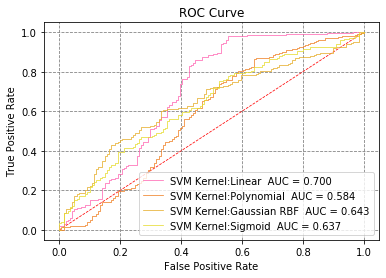

In [56]:
# The ROC Curve Plotting
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rc('grid', linestyle="--", color='grey')
plt.grid()
plt.plot([0, 1], [0, 1],'r--', linewidth=0.75)
plt.plot(fpr_svm_l, tpr_svm_l, color='#FF69B4', linewidth=0.75, label = 'SVM Kernel:Linear  AUC = %0.3f' % roc_auc_svm_l)
plt.plot(fpr_svm_p5, tpr_svm_p5, color='#F08228', linewidth=0.75, label = 'SVM Kernel:Polynomial  AUC = %0.3f' % roc_auc_svm_p5)
plt.plot(fpr_svm_r, tpr_svm_r, color='#E6AF2D', linewidth=0.75, label = 'SVM Kernel:Gaussian RBF  AUC = %0.3f' % roc_auc_svm_r)
plt.plot(fpr_svm_s, tpr_svm_s, color='#E6DC32', linewidth=0.75, label = 'SVM Kernel:Sigmoid  AUC = %0.3f' % roc_auc_svm_s)
plt.legend(loc = 'lower right')
plt.show()

In [57]:
### Linear ###

# Training, and prediction on Test dataset. Confusion matrix
modelo_svm_l.fit(X_train_sc,y_train)
pred_svm_l = modelo_svm_l.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
confusion_matrix(y_test, pred_svm_l)

Matriz de confusión


array([[ 19,  32],
       [  1, 133]])

In [58]:
# Other additional metrics on Test dataset predictions
from sklearn.metrics import classification_report
print('Indicadores ')
print(classification_report(y_test, pred_svm_l))

Indicadores 
              precision    recall  f1-score   support

           N       0.95      0.37      0.54        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.82       185
   macro avg       0.88      0.68      0.71       185
weighted avg       0.85      0.82      0.79       185



In [59]:
### Poly ###

# Training, and prediction on Test dataset. Confusion matrix
modelo_svm_p5.fit(X_train_sc,y_train)
pred_svm_p5 = modelo_svm_p5.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
confusion_matrix(y_test, pred_svm_p5)

Matriz de confusión


array([[26, 25],
       [40, 94]])

In [60]:
# Other additional metrics on Test dataset predictions
from sklearn.metrics import classification_report
print('Indicadores ')
print(classification_report(y_test, pred_svm_p5))

Indicadores 
              precision    recall  f1-score   support

           N       0.39      0.51      0.44        51
           Y       0.79      0.70      0.74       134

    accuracy                           0.65       185
   macro avg       0.59      0.61      0.59       185
weighted avg       0.68      0.65      0.66       185



In [61]:
### RBF ###

# Training, and prediction on Test dataset. Confusion matrix
modelo_svm_r.fit(X_train_sc,y_train)
pred_svm_r = modelo_svm_r.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
confusion_matrix(y_test, pred_svm_r)

Matriz de confusión


array([[ 17,  34],
       [ 21, 113]])

In [62]:
# Other additional metrics on Test dataset predictions
from sklearn.metrics import classification_report
print('Indicadores ')
print(classification_report(y_test, pred_svm_r))

Indicadores 
              precision    recall  f1-score   support

           N       0.45      0.33      0.38        51
           Y       0.77      0.84      0.80       134

    accuracy                           0.70       185
   macro avg       0.61      0.59      0.59       185
weighted avg       0.68      0.70      0.69       185



In [63]:
### Sigmoid ###

# Training, and prediction on Test dataset. Confusion matrix
modelo_svm_s.fit(X_train_sc,y_train)
pred_svm_s = modelo_svm_s.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
print('Matriz de confusión')
confusion_matrix(y_test, pred_svm_s)

Matriz de confusión


array([[ 22,  29],
       [ 26, 108]])

In [103]:
# Other additional metrics on Test dataset predictions
from sklearn.metrics import classification_report
print('Indicadores ')
print(classification_report(y_test, pred_svm_s))

Indicadores 
              precision    recall  f1-score   support

           N       0.46      0.43      0.44        51
           Y       0.79      0.81      0.80       134

    accuracy                           0.70       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.70      0.70      0.70       185

